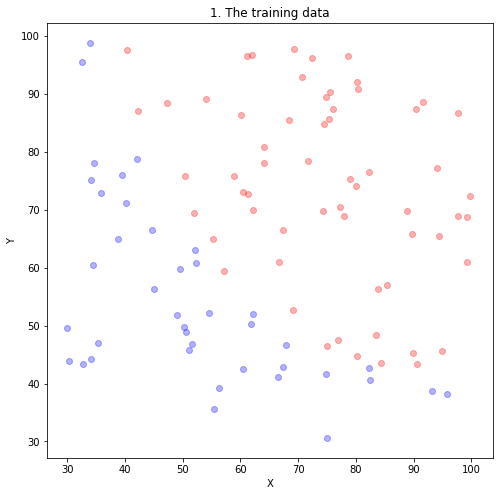

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

path = "data.txt"
data    = np.genfromtxt(path, delimiter=',')

x       = data[:, 0:1]
y       = data[:, 1:2]
label   = data[:, 2:3]

x_label0    = x[label == 0]
x_label1    = x[label == 1]
y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('1. The training data')
plt.show()


In [2]:
m = len(x)
x_0 = np.ones((1, m), dtype=np.float64)
x_1 = x.T
x_2 = y.T
label = label.T
feature = np.concatenate((x_0, x_1, x_2), axis=0)

learning_rate = 0.0003
list_theta_0 = list()
list_theta_1 = list()
list_theta_2 = list()

t = 1
iteration = list()
temp_j_value = 0
j_value = list()

In [3]:
theta=np.ones((3,1), dtype=np.float64)
theta[0,0]=-10
theta[1,0]=2
theta[2,0]=1

In [4]:
while True:
    z = (theta.T).dot(feature)
    sigmoid = 1 / (1 + np.exp(-z))
    if t>1 and abs(temp_j_value - (-(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m)) <= 0.00001:
        fin_theta = theta
        break
    temp_j_value = -(np.sum((label*np.log(sigmoid))+(1-label)*np.log(1-sigmoid)))/m
    j_value.append(temp_j_value)
    iteration.append(t)
    #print(t, temp_j_value, '\n')
    t += 1

    list_theta_0.append(theta[0,0])
    list_theta_1.append(theta[1,0])
    list_theta_2.append(theta[2,0])
    theta = theta - learning_rate * feature.dot((sigmoid-label).T) / m

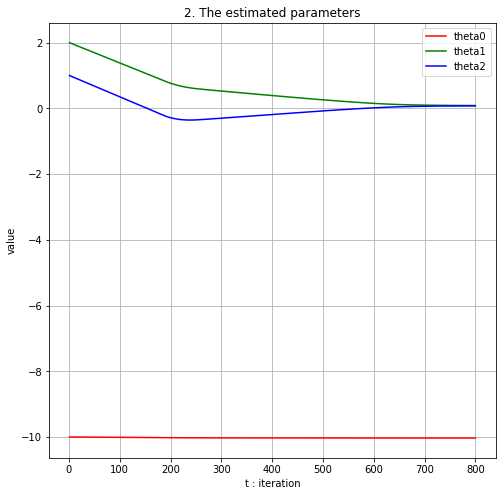

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(iteration, list_theta_0, c = 'red')
plt.plot(iteration, list_theta_1, c = 'green')
plt.plot(iteration, list_theta_2, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('value')
plt.title('2. The estimated parameters')
plt.legend(['theta0', 'theta1', 'theta2'])
plt.grid()
plt.show()

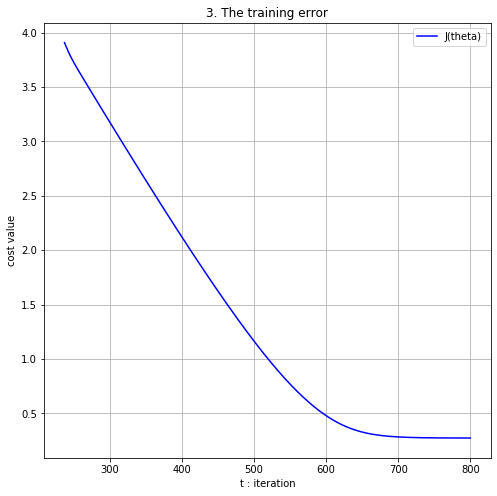

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(iteration, j_value, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('cost value')
plt.title('3. The training error')
plt.legend(['J(theta)'])
plt.grid()
plt.show()

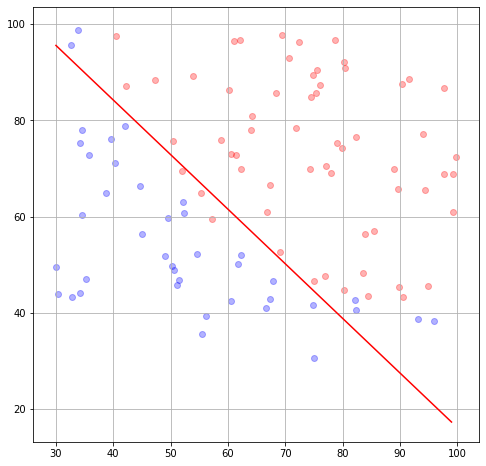

In [7]:
plt.figure(figsize=(8, 8))
x_pred_line = [x1 for x1 in range(30, 100)]
y_pred_line = [-(fin_theta[1,0] * y1 + fin_theta[0,0])/fin_theta[2,0] for y1 in range(30, 100)]
plt.plot(x_pred_line, y_pred_line, c = 'red')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.grid()
plt.show()

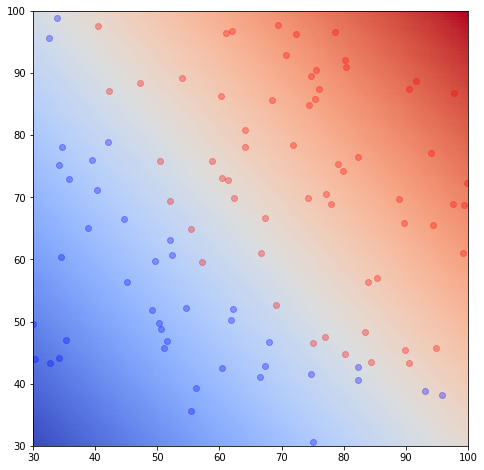

In [8]:
xlin = np.arange(30,100,0.5)
ylin = np.arange(30,100,0.5)
X,Y = np.meshgrid(xlin, ylin)
Z = fin_theta[0,0]+fin_theta[1,0]*X+fin_theta[2,0]*Y

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.imshow(Z, cmap='coolwarm', extent=(30,100,30,100), origin='lower')
plt.show()